In [12]:
%matplotlib notebook
import numpy as np
import numpy.fft as fft
import scipy.signal as signal 
import sounddevice as sd
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as pyplot
import time

0.8090169943749475


<IPython.core.display.Javascript object>


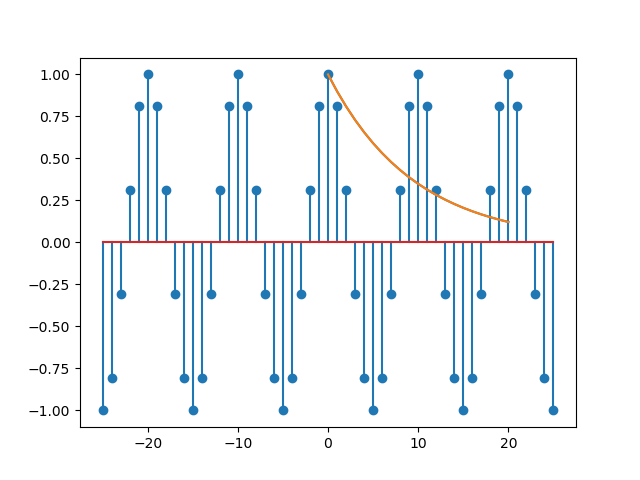

<StemContainer object of 3 artists>

In [99]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as mpt

interval = 51
ref = interval // 2
x = np.arange(-ref, ref + (0 if interval % 2 == 0 else 1), 1)
f = 1
Fs = 10 * f
w = 2 * np.pi * f
y = np.cos((w/Fs) * x )
print(y[ref + 1])

mpt.stem(x, y)

<IPython.core.display.Javascript object>


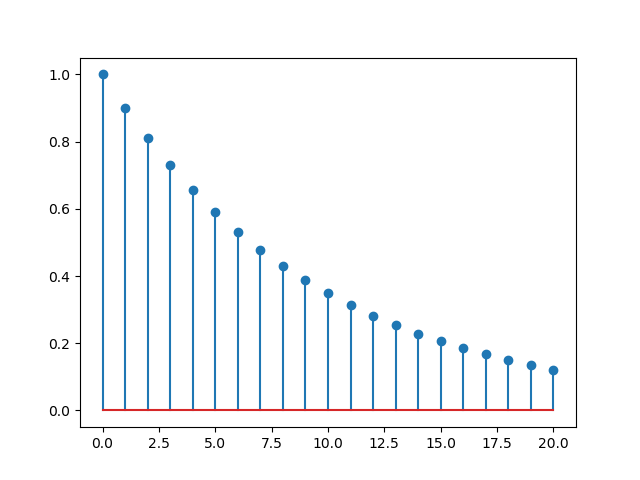

<StemContainer object of 3 artists>

In [117]:
n = np.arange(0, 21, 1)
y = 0.9 ** n
mpt.figure()
mpt.stem(n, y)

Sample rate:  44100
Sample data type:  int16
Data shape:  (485100, 2)
Duration 11.0
Memory usage:  1940400


<IPython.core.display.Javascript object>


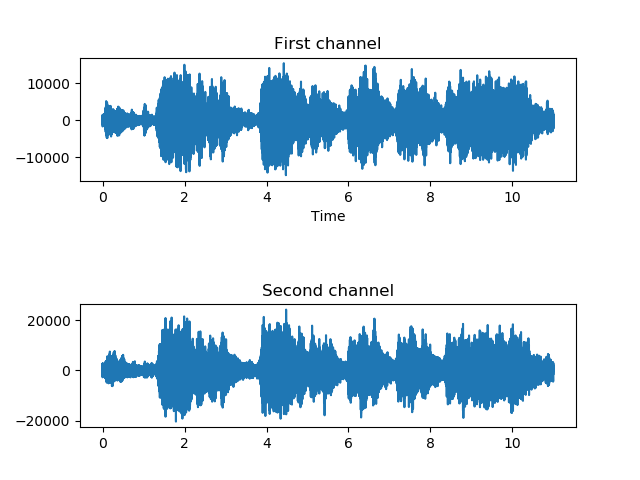

Text(0.5, 1.0, 'Second channel')

In [103]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as mpt
import scipy.io.wavfile as wavfile
import sounddevice as sd
import numpy as np

sampleRate, data = wavfile.read("handel44100.wav")
print("Sample rate: ", sampleRate)
print("Sample data type: ", data.dtype)
print("Data shape: ", data.shape)
print("Duration", data.shape[0] / sampleRate)
print("Memory usage: ", data.nbytes)

x = np.linspace(0, 11, data.shape[0])
ch1 = data[:,0]
ch2 = data[:, 1]
mpt.figure()
mpt.subplots_adjust(hspace = 1)
mpt.subplot(2, 1, 1)
mpt.plot(x, ch1)
mpt.title("First channel")
mpt.xlabel("Time")
mpt.subplot(2, 1, 2)
mpt.plot(x, ch2)
mpt.title("Second channel")

Size:  80
Periods included in buffer:  4.0


<IPython.core.display.Javascript object>


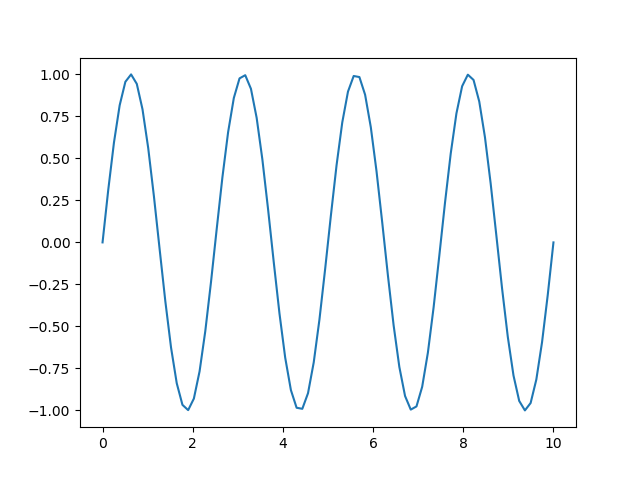

<IPython.core.display.Javascript object>


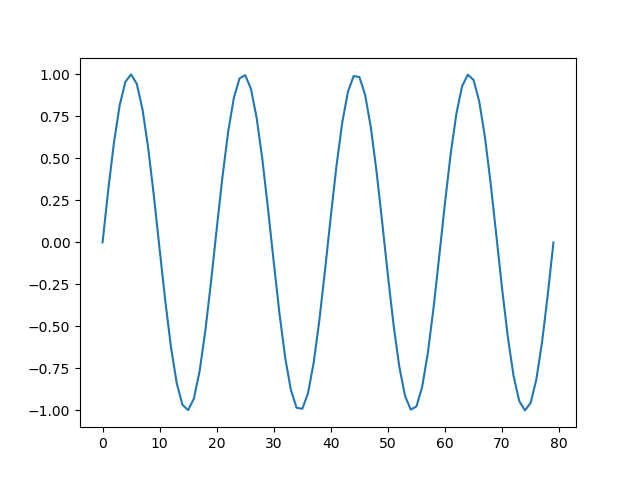

<IPython.core.display.Javascript object>


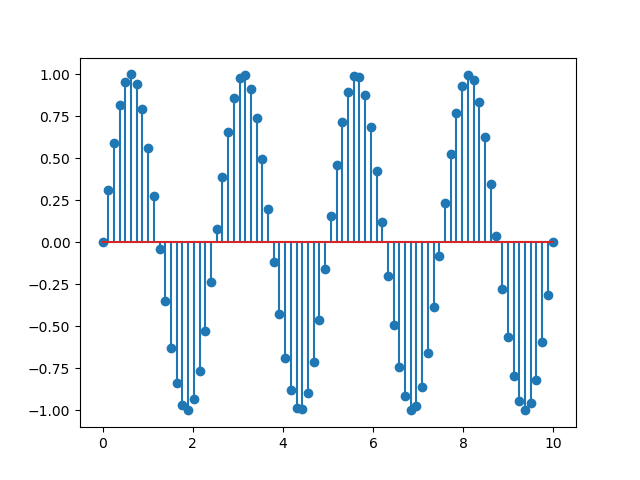

<IPython.core.display.Javascript object>


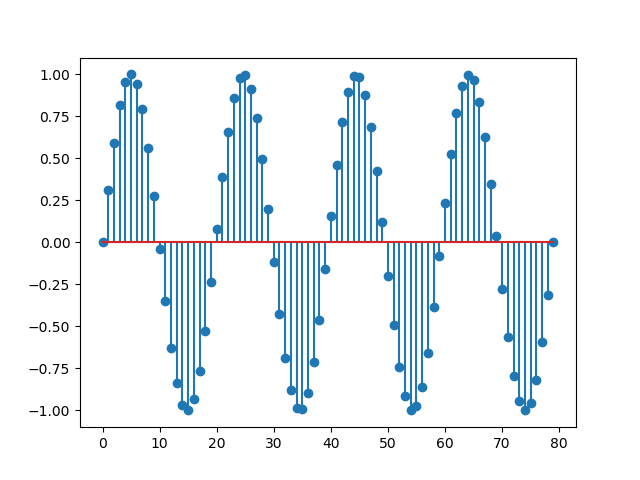

<StemContainer object of 3 artists>

In [56]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import sounddevice as sd

def sinus(A, F_0, phi, t_start, t_end, F_s):
    t = np.linspace(t_start, t_end ,round((t_end - t_start) * F_s))
    s = A * np.sin(2 * np.pi * F_0 * t + phi)
    return (s, t)

F_s = 8000
A = 1
F_0 = 400
length = 0.010
phi = 0 * np.pi / 180
s, t = sinus(A, F_0, phi, 0, length, F_s)

tMs = t * 1000
print("Size: ", s.size)
print("Periods included in buffer: ", (s.size / F_s) * F_0)

pyplot.figure()
pyplot.plot(tMs, s)
pyplot.figure()
pyplot.plot(s)
pyplot.figure()
pyplot.stem(tMs, s)
pyplot.figure()
pyplot.stem(s)


In [17]:
import numpy as np

def convolution(x, h):
    resSize = x.size + h.size - 1
    res = np.zeros(resSize)
    
    extendX = np.concatenate((np.zeros(h.size - 1), x, np.zeros(h.size - 1)))
    for n in range(resSize):
        res[n] = extendX[n: n + h.size].dot(h[::-1])
    
    return res


def correlation(x, y):
    return convolution(x, y[::-1])

y = convolution(np.array([0, 1, 1 / 2, 1 / 3, 5, 2]), np.array([1, 1, 0]))
print(y)
print(y.size)

[0.         1.         1.5        0.83333333 5.33333333 7.
 2.         0.        ]
8


[ 1.  4.  8.  8.  3. -2. -1.]


<IPython.core.display.Javascript object>


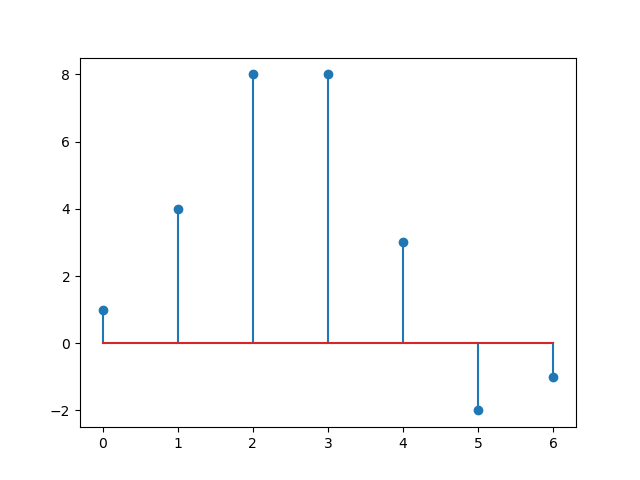

<StemContainer object of 3 artists>

In [15]:
%matplotlib notebook
import matplotlib.pyplot as pyplot
x = np.array([1, 2, 3, 1])
h = np.array([1, 2, 1, -1])

y1 = convolution(x, h)
print(y1)
pyplot.figure()
pyplot.stem(y1)

[ 0.  0.  1.  4.  8.  8.  3. -2. -1.]
[ 0  0  1  4  8  8  3 -2 -1]


<IPython.core.display.Javascript object>


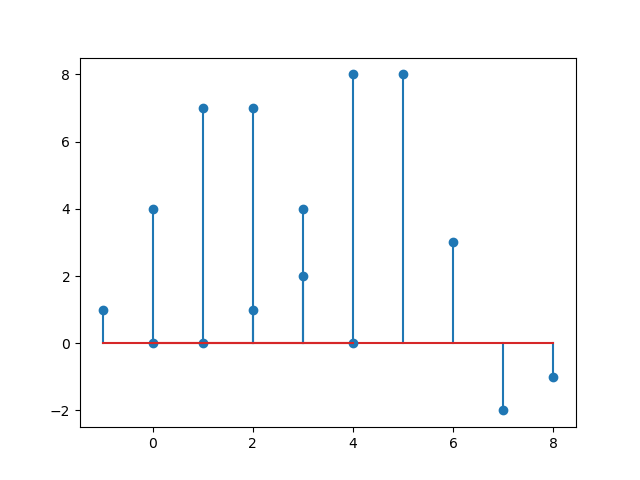

<StemContainer object of 3 artists>

In [16]:
x = np.array([0,0,1,2,3,1])
y2 = convolution(x, h)
y3 = np.convolve(x, h)
print(y2)
print(y3)
pyplot.figure()
pyplot.stem(y2)

[ 1  4  8  8  3 -2 -1]


<IPython.core.display.Javascript object>


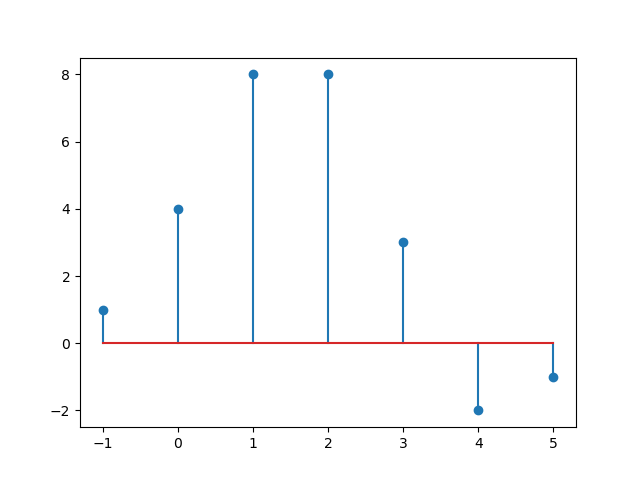

<StemContainer object of 3 artists>

In [28]:
x = np.array([1, 2, 3, 1])
h = np.array([1, 2, 1, -1])
n0 = 1
y = convolution(x, h)
print(y1)
xAxis = np.arange(-n0, x.size + h.size - 1 - n0)
pyplot.figure()
pyplot.stem(xAxis, y)

In [1]:
%matplotlib notebook
import scipy.io.wavfile as wavfile
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal

def convolveCh2Int16(x, h):
    ch1 = signal.fftconvolve(x[:, 0].astype(np.float32), h[:, 0])
    ch2 = signal.fftconvolve(x[:, 1].astype(np.float32), h[:, 1])
    ch1Max = np.amax(np.absolute(ch1))
    ch2Max = np.amax(np.absolute(ch2))
    print(ch1Max)
    print(ch2Max)
    ch1 = (ch1 * (32767 / ch1Max)).astype(np.int16)
    ch2 = (ch2 * (32767 / ch2Max)).astype(np.int16)
    return np.column_stack((ch1, ch2))
    

sampleRate, handel = wavfile.read("handel44100.wav")
impulseSampleRate, impulse = wavfile.read("In The Silo.wav")
res = convolveCh2Int16(handel, impulse)
sd.play(handel, sampleRate)
sd.wait()
sd.play(res, sampleRate)
wavfile.write("out.wav", sampleRate, res)

5156779287.65787
7265728508.977968


<IPython.core.display.Javascript object>


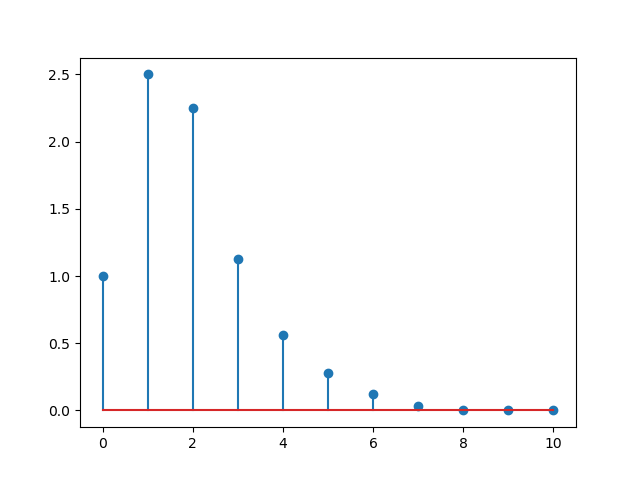

<IPython.core.display.Javascript object>


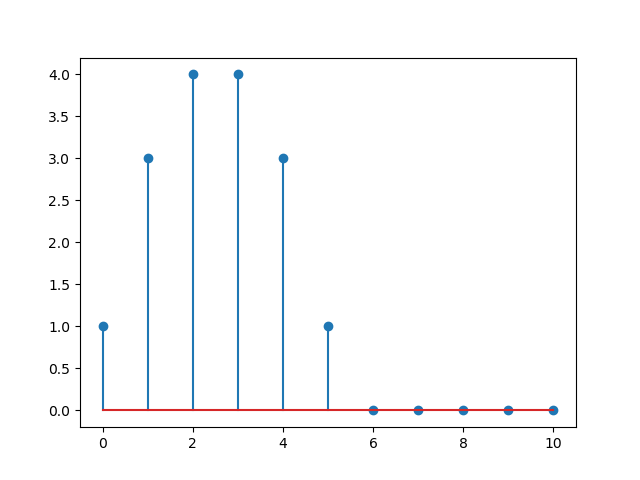

<StemContainer object of 3 artists>

In [47]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot

x = np.array([1, 2, 1])
h1 = np.array([1, 1 / 2, 1 / 4, 1 / 8, 1/16, 1 / 32])
h2 = np.array([1, 1, 1, 1])

res1 = convolution(x, h1)
res2 = convolution(x, h2)
res1 = np.concatenate((res1, np.zeros(11 - res1.size)))
res2 = np.concatenate((res2, np.zeros(11 - res2.size)))
pyplot.figure()
pyplot.stem(np.arange(0, 11), res1)
pyplot.figure()
pyplot.stem(np.arange(0, 11), res2)

<IPython.core.display.Javascript object>


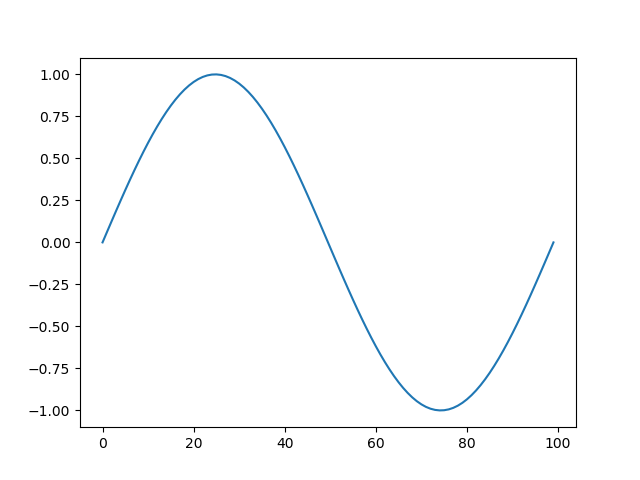

<IPython.core.display.Javascript object>


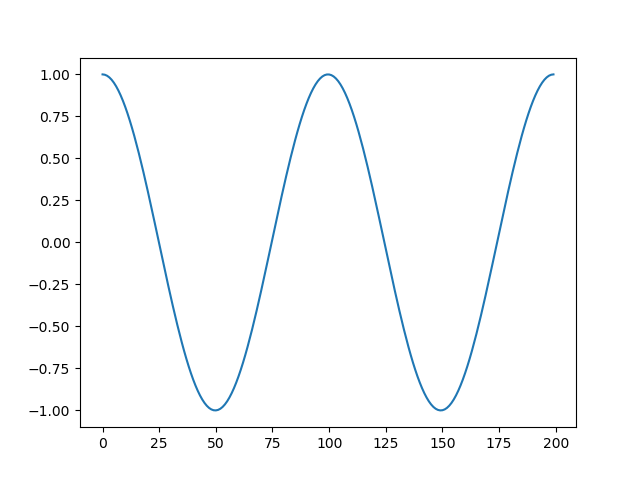

<IPython.core.display.Javascript object>


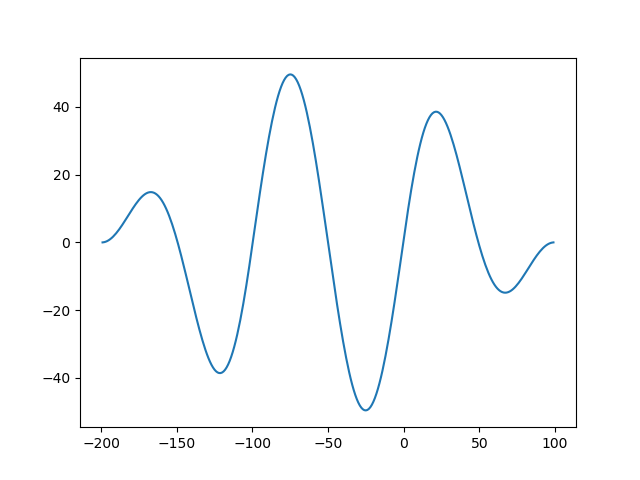

In [23]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal

t1 = np.linspace(0, 1, 100)
t2 = np.linspace(0, 2, 200)
f = 1
x1 = np.sin(2 * np.pi * f * t1)
x2 = np.cos(2 * np.pi * f * t2)
y = correlation(x1, x2)
n = np.arange(y.size) - x2.size + 1 
pyplot.figure()
pyplot.plot(x1)
pyplot.figure()
pyplot.plot(x2)
pyplot.figure()
pyplot.plot(n, y)

<IPython.core.display.Javascript object>


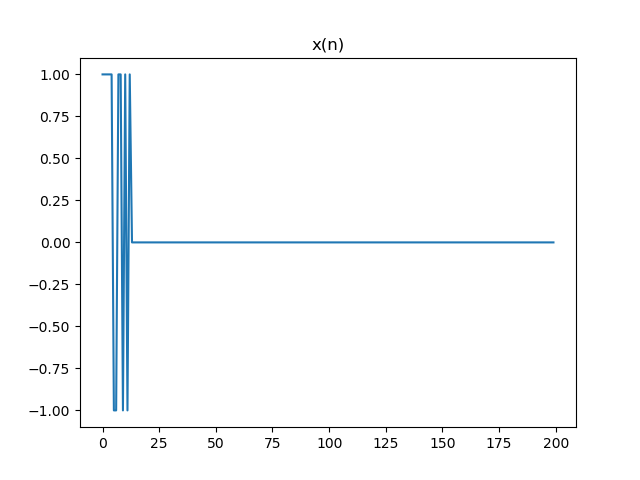

<IPython.core.display.Javascript object>


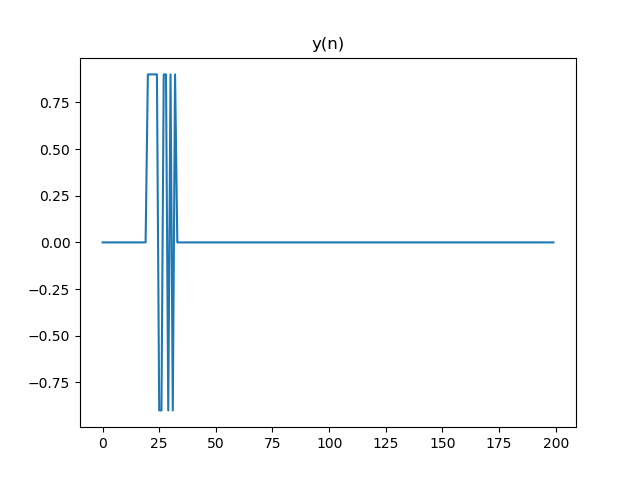

<IPython.core.display.Javascript object>


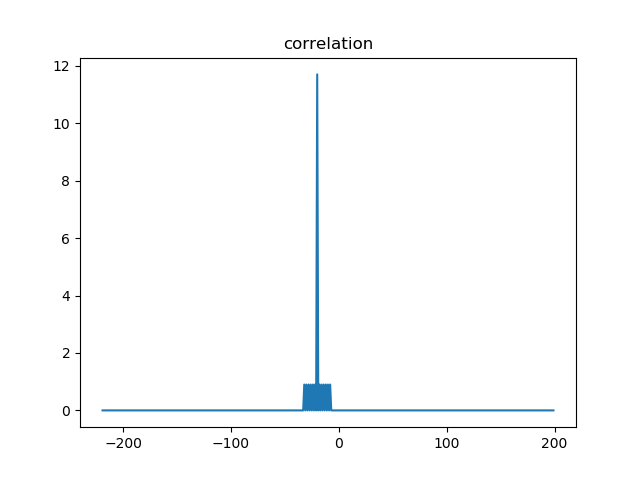

Text(0.5, 1.0, 'correlation')

In [15]:
%matplotlib notebook
import numpy.random as random
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal

a = 0.9
D = 20
x = np.array([ 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1])
x = np.concatenate((x, np.zeros(200 - x.size)))
w = random.normal(0, 0.01 ** (1 / 2), x.size + D)
n = np.arange(0, 200)
y = a * np.concatenate((np.zeros(D), x))
pyplot.figure()
pyplot.plot(n, x[:n.size])
pyplot.title("x(n)")
pyplot.figure()
pyplot.plot(n, y[:n.size])
pyplot.title("y(n)")
corr = signal.correlate(x, y)
corrN = np.arange(0, corr.size) - y.size + 1
pyplot.figure()
pyplot.plot(corrN, corr)
pyplot.title("correlation")

<IPython.core.display.Javascript object>


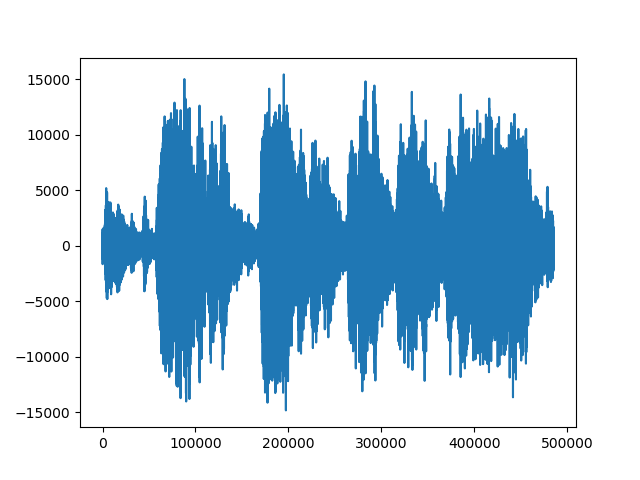

<IPython.core.display.Javascript object>


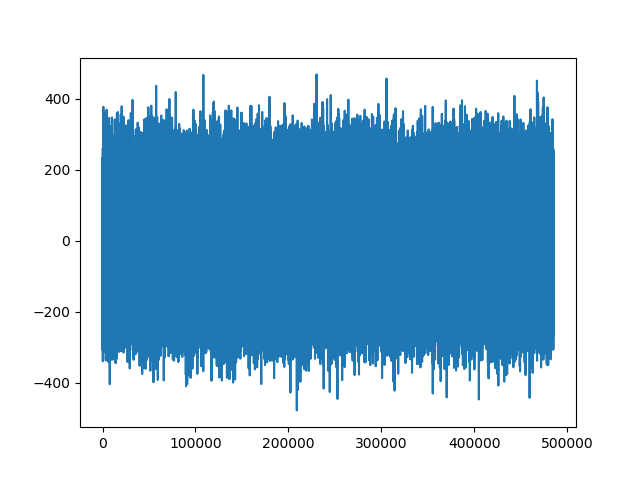

<IPython.core.display.Javascript object>


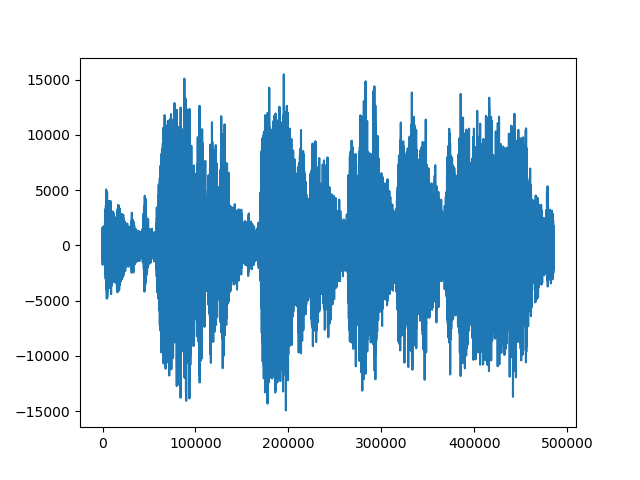

<IPython.core.display.Javascript object>


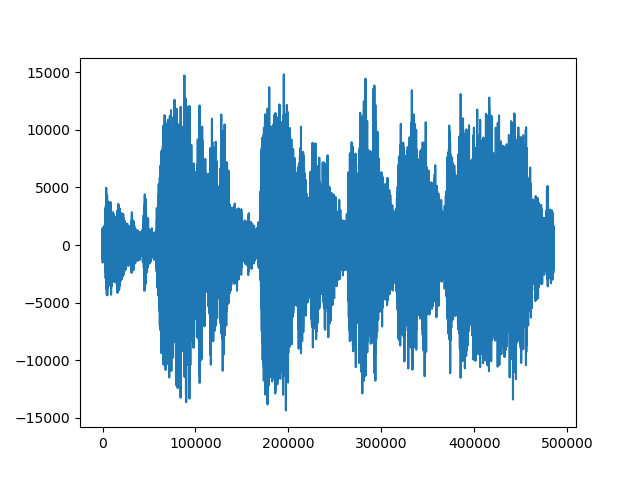

In [55]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal as signal
import sounddevice as sd
import scipy.io.wavfile as wavfile
import numpy.random as random

(sampleRate, sound) = wavfile.read("handel44100.wav")
noise = random.normal(0, 100, sound.shape)
soundNoise = (sound + noise).astype(np.int16)
averageCount = 4
average = np.full(averageCount, 1 / averageCount)

noiseReducedCh1 = signal.convolve(soundNoise[:, 0], average).astype(np.int16)
noiseReducedCh2 = signal.convolve(soundNoise[:, 1], average).astype(np.int16)
noiseReduced = np.column_stack((noiseReducedCh1, noiseReducedCh2))

sd.play(soundNoise, sampleRate);
sd.wait()
sd.play(noiseReduced, sampleRate)
sd.wait()

pyplot.figure()
pyplot.plot(sound[:, 0])
pyplot.figure()
pyplot.plot(noise[:, 0])
pyplot.figure()
pyplot.plot(soundNoise[:, 0])
pyplot.figure()
pyplot.plot(noiseReduced[:, 0])



<IPython.core.display.Javascript object>


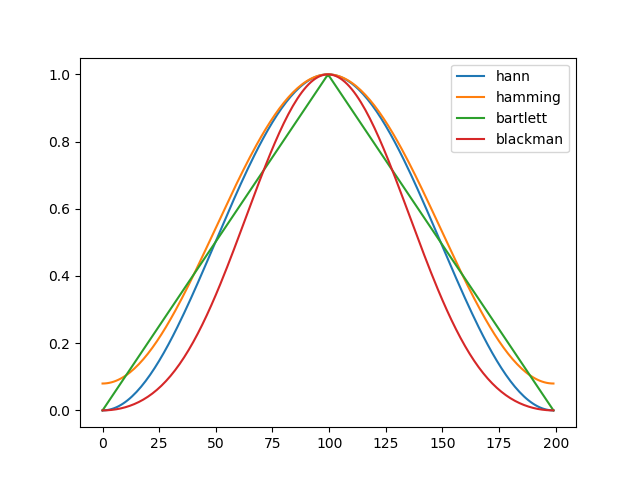

In [16]:
%matplotlib notebook
import numpy as np
import scipy.signal.windows as windows
import matplotlib.pyplot as pyplot

pyplot.figure()
pyplot.plot(windows.hann(200))
pyplot.plot(windows.hamming(200))
pyplot.plot(windows.bartlett(200))
pyplot.plot(windows.blackman(200))
pyplot.legend(["hann", "hamming", "bartlett", "blackman"])

<IPython.core.display.Javascript object>


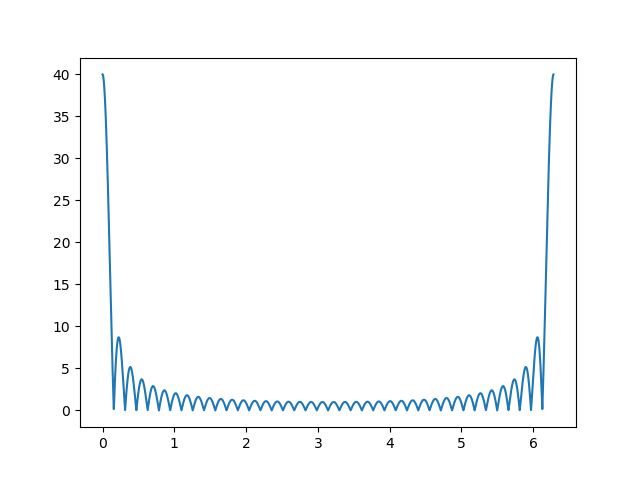

In [37]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.signal.windows as windows
import scipy.signal as signal
import numpy.fft as fft
N = 20
L = N * 2
pad = (100 - L) // 2
square = windows.boxcar(L)
window = np.pad(square, (pad, pad), mode = "constant", constant_values = 0)
(w, H) = signal.freqz(window, 1, 4096, True)
pyplot.figure()
pyplot.plot(w, np.abs(H))

<IPython.core.display.Javascript object>


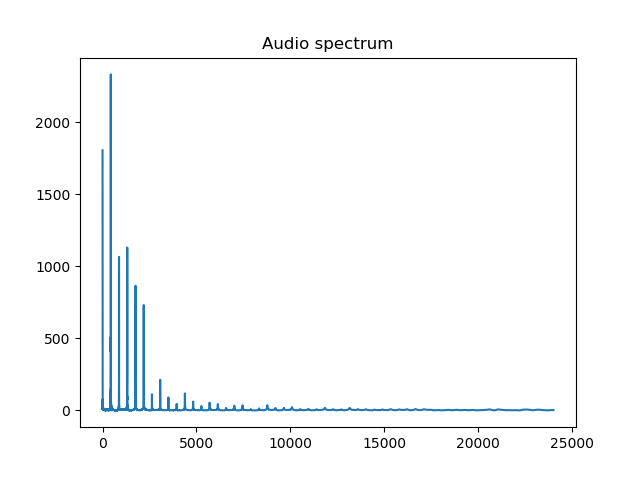

<IPython.core.display.Javascript object>


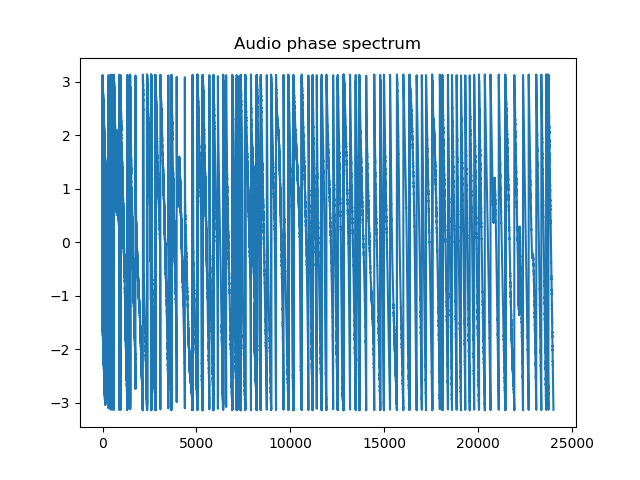

<IPython.core.display.Javascript object>


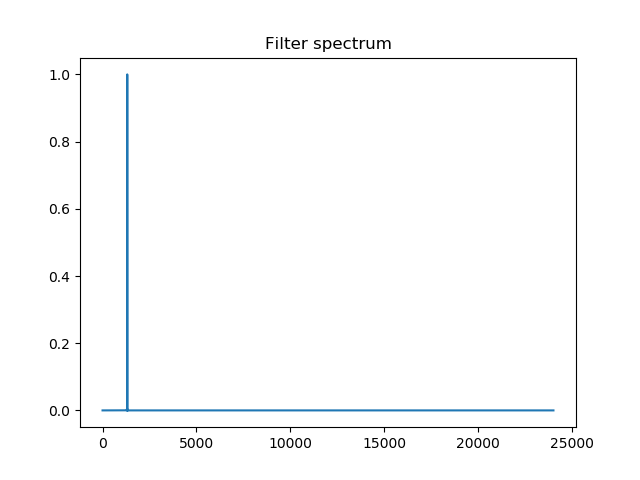

<IPython.core.display.Javascript object>


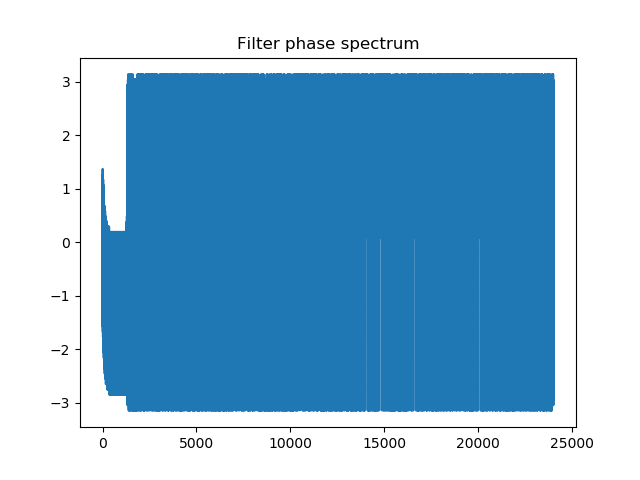

<IPython.core.display.Javascript object>


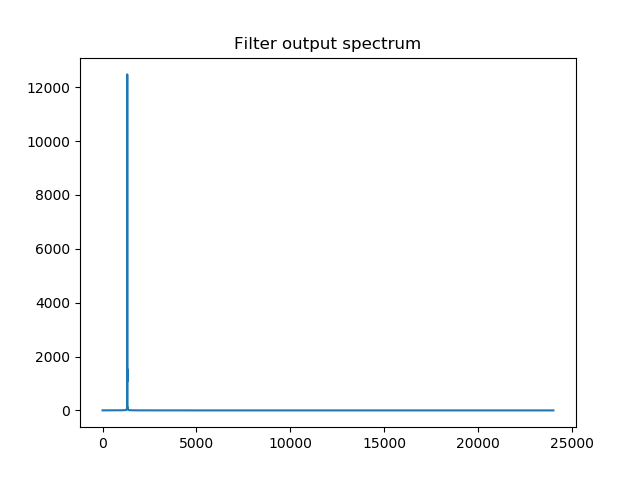

<IPython.core.display.Javascript object>


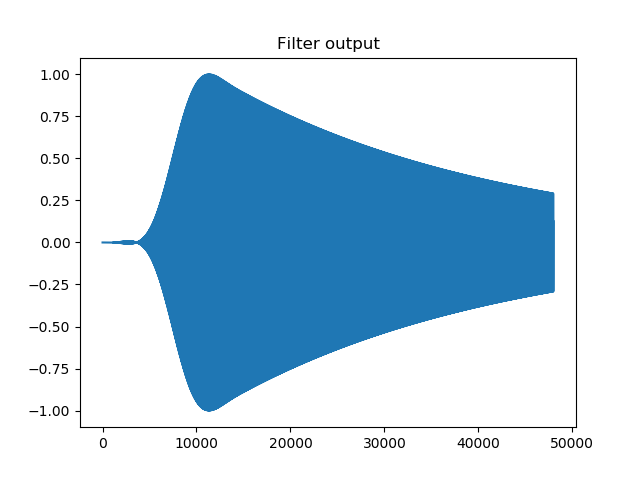

In [326]:
%matplotlib notebook
import numpy as np
import scipy.signal as signal 
import sounddevice as sd
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as pyplot
fs, data = wavfile.read("440.wav")
w, dataSpectrum = signal.freqz(data, 1, fs, fs = fs)
pyplot.figure()
pyplot.title("Audio spectrum")
pyplot.plot(w, np.abs(dataSpectrum))
pyplot.figure()
pyplot.title("Audio phase spectrum")
pyplot.plot(w, np.angle(dataSpectrum))
b = signal.firwin(15001, [1310, 1320], window = "hann", pass_zero = False, fs = fs)
w, filterSpectrum = signal.freqz(b, 1, fs, fs = fs)
pyplot.figure()
pyplot.title("Filter spectrum")
pyplot.plot(w, np.abs(filterSpectrum))
pyplot.figure()
pyplot.title("Filter phase spectrum")
pyplot.plot(w, np.angle(filterSpectrum))
result = signal.lfilter(b, 1, data)
maxValue = np.amax(np.abs(result))
result /= maxValue
sd.play(result, fs)
w, resSpectrum = signal.freqz(result, 1, fs, fs = fs)
pyplot.figure()
pyplot.title("Filter output spectrum")
pyplot.plot(w, np.abs(resSpectrum))
pyplot.figure()
pyplot.title("Filter output")
pyplot.plot(result)
wavfile.write("output.wav", fs, result.astype(np.float32))

<IPython.core.display.Javascript object>


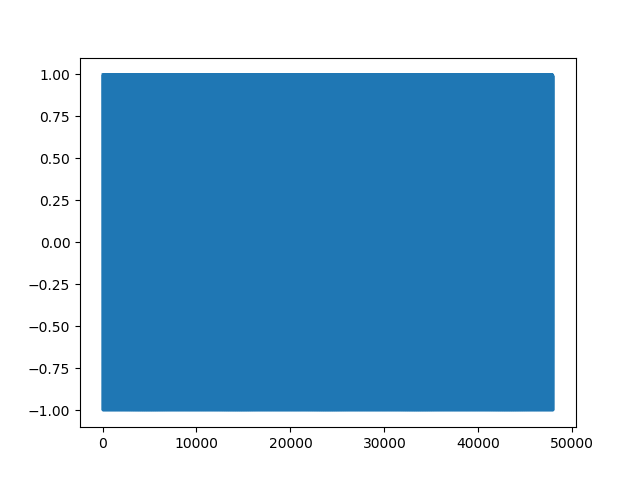

<IPython.core.display.Javascript object>


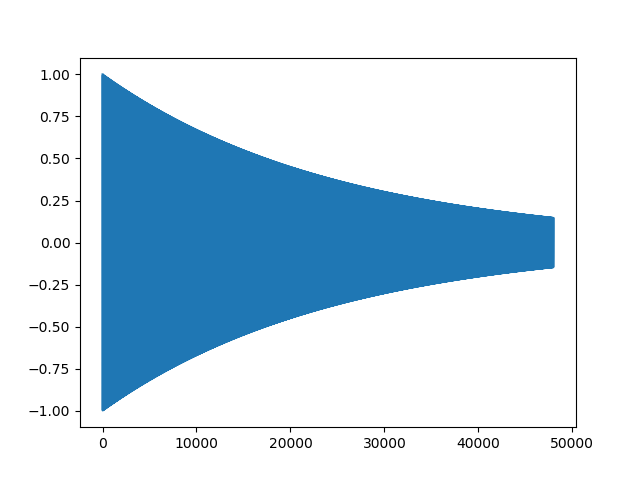

<IPython.core.display.Javascript object>


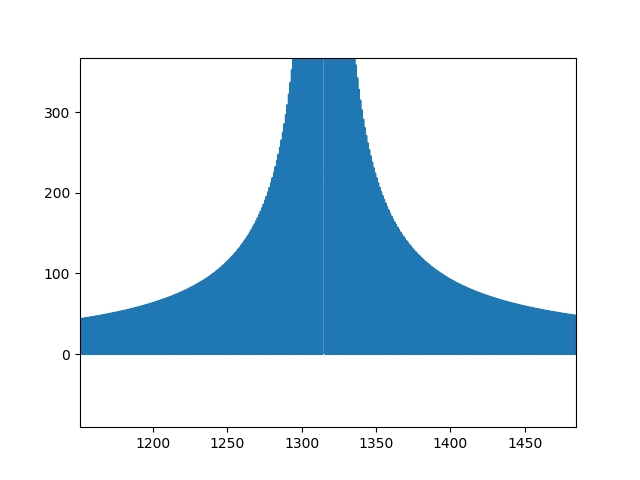

<IPython.core.display.Javascript object>


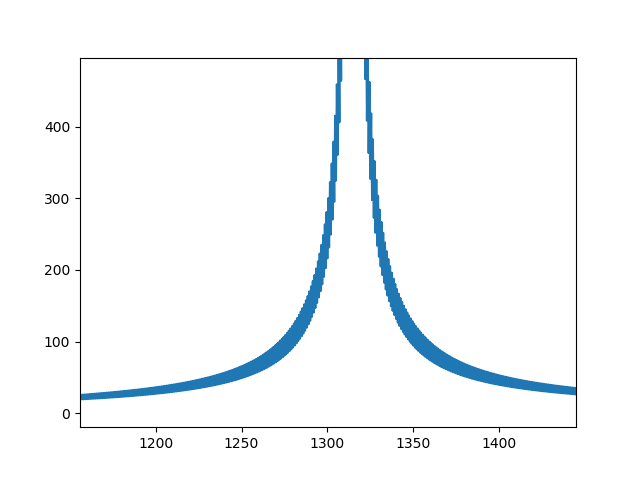

In [262]:
def genSineWave(A, f,  fs, l):
    n = np.arange(0, l * fs)
    return A * np.cos((2 * np.pi * f / fs) * n)

A = 1
fs = 48000
l = 1
n = np.arange(0, l * fs)
f = 1315
k = 0.00004
xDecay = A * np.e ** (-k*n) * np.cos((2 * np.pi * f / fs) * n)
x = genSineWave(A, f, fs, l)
sd.play(x, fs)
sd.wait()
pyplot.figure()
pyplot.plot(x)
pyplot.figure()
pyplot.plot(xDecay)
w, X = signal.freqz(x, 1, s * fs, fs = fs)
wDecay,XDecay = signal.freqz(xDecay, 1, s * fs, fs = fs)
pyplot.figure()
pyplot.plot(w, np.abs(X))
pyplot.figure()
pyplot.plot(wDecay, np.abs(XDecay))
#pyplot.figure()
#pyplot.plot(w, np.angle(X))
#pyplot.figure()
#pyplot.plot(wDecay, np.angle(XDecay))

<IPython.core.display.Javascript object>


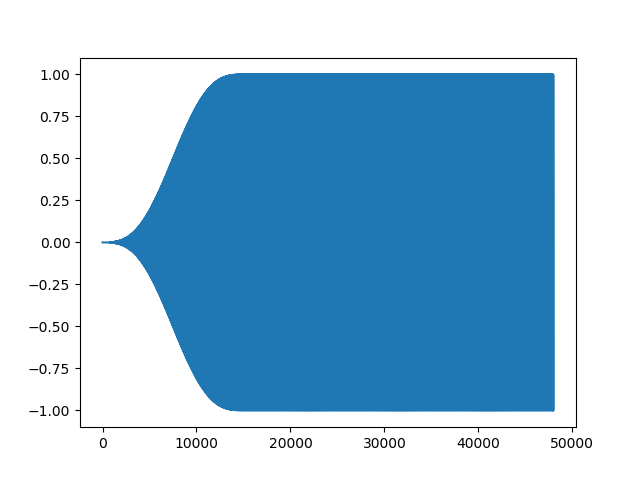

In [265]:
b = signal.firwin(15001, [1314, 1316], window = "hann", pass_zero = False, fs = fs)
sine440 = genSineWave(1, 440, fs, l)
result = signal.lfilter(b, 1, x + sine440)
result /= np.amax(np.abs(result))
sd.play(result, fs)
sd.wait()
pyplot.figure()
pyplot.plot(result)

<IPython.core.display.Javascript object>


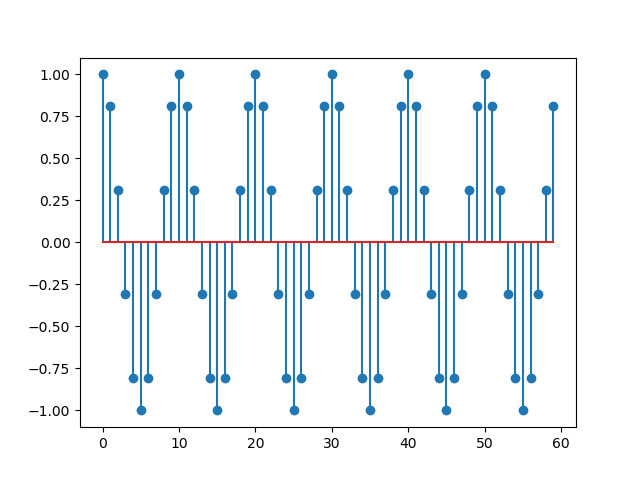

<IPython.core.display.Javascript object>


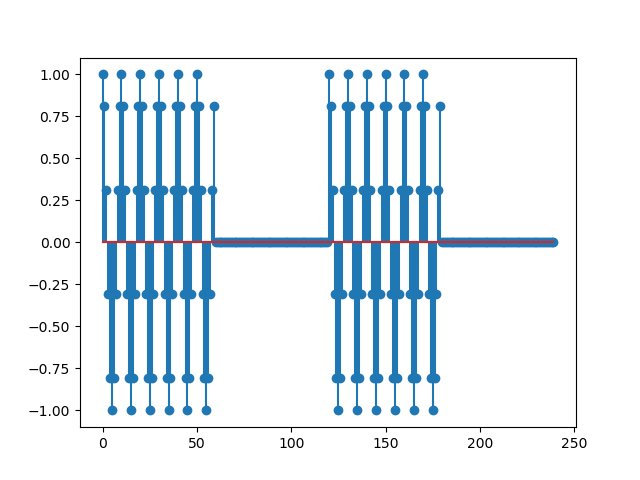

<IPython.core.display.Javascript object>


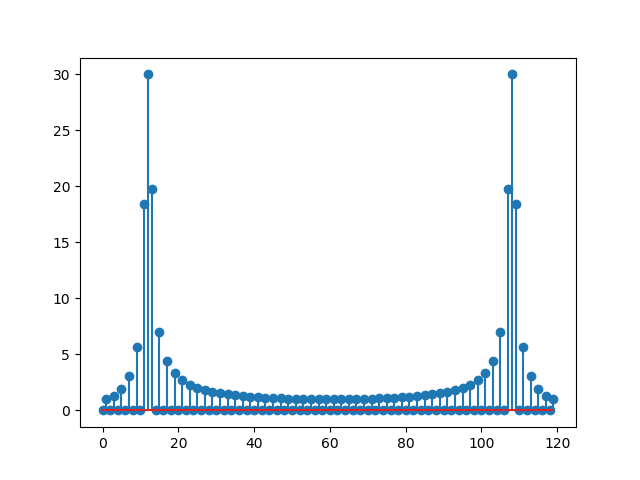

<StemContainer object of 3 artists>

In [314]:
N = 120
n = np.arange(0, 60)
x = np.cos((np.pi / 5) * n)
pyplot.figure()
pyplot.stem(x)
x = np.pad(x, (0, N - 60), mode = "constant", constant_values = 0)
xP = np.concatenate((x, x))
pyplot.figure()
pyplot.stem(xP)
X = fft.fft(x, N)
pyplot.figure()
pyplot.stem(np.arange(0, N), np.abs(X))

C:\Users\Gebruiker\Anaconda3\envs\odos\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


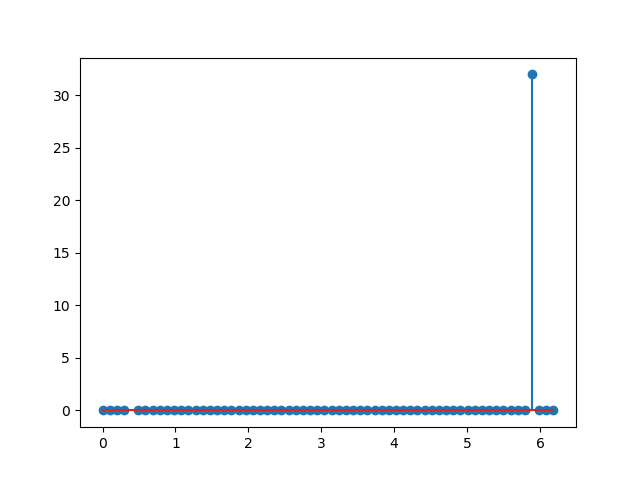

[-2.46268609e-15+0.00000000e+00j -2.46065074e-15-1.22464680e-16j
 -2.45454060e-15-2.44929360e-16j -2.44434339e-15-3.67394040e-16j
             nan           +nanj -2.41159706e-15-6.12323400e-16j
 -2.38898127e-15-7.34788079e-16j -5.32581692e-15-2.63360960e-15j
 -2.33103112e-15-9.79717439e-16j  9.95646254e-17+6.74174720e-16j
 -2.25570135e-15-1.22464680e-15j -9.13581515e-15-4.89982516e-15j
 -2.16234100e-15-1.46957616e-15j  3.25714094e-15+1.96067284e-15j
 -2.05011399e-15-1.71450552e-15j -6.26771519e-15-5.38968388e-15j
 -1.91797090e-15-1.95943488e-15j  1.61581167e-15+1.47081412e-15j
 -3.66357662e-15-5.75707792e-15j -4.47955112e-15-5.87954260e-15j
 -1.58843582e-15-2.44929360e-15j  7.54392708e-16+9.80955401e-16j
 -5.38081848e-15-9.79965032e-15j -3.03936059e-15-6.36940132e-15j
 -1.15931918e-15-2.93915232e-15j  2.94072837e-16+4.91096681e-16j
  1.34790492e-15+3.92134568e-15j -1.68677076e-15-6.85926004e-15j
 -6.08718376e-16-3.42901104e-15j  9.98608004e-17+1.23796127e-18j
 -1.00568326e-15-1.077936

<StemContainer object of 3 artists>

In [325]:
w = np.arange(0, 64) * np.pi * 2 / 64
pi8 = np.pi / 8
X = 0.5 * (1 - np.e ** ((pi8 - w)*64j)) / (1 - np.e ** ((pi8 - w)*1j)) + 0.5 * (1 - np.e ** ((pi8 + w)*-64j)) / (1 - np.e ** ((pi8 + w)*-1j)) 
pyplot.figure()
print(X)
pyplot.stem(w, np.abs(X))

<IPython.core.display.Javascript object>


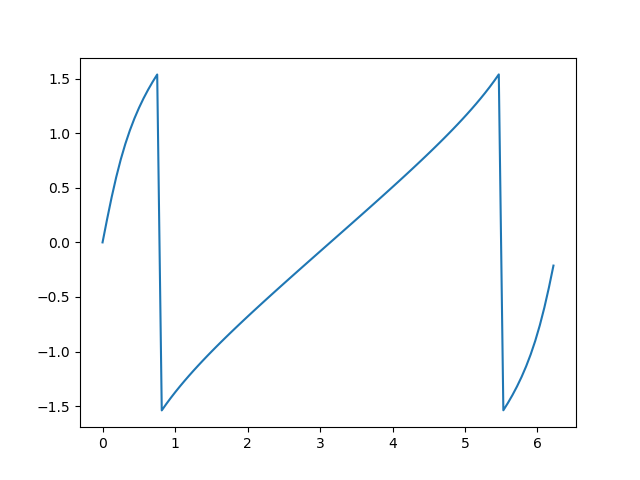

In [348]:
w = np.linspace(0, np.pi, 100)
n = np.arange(100)
h = np.cos(np.pi * n / 4)
H = fft.fft(h)
pyplot.figure()
pyplot.plot(2 * np.pi * n / len(H), np.angle(H))

<IPython.core.display.Javascript object>


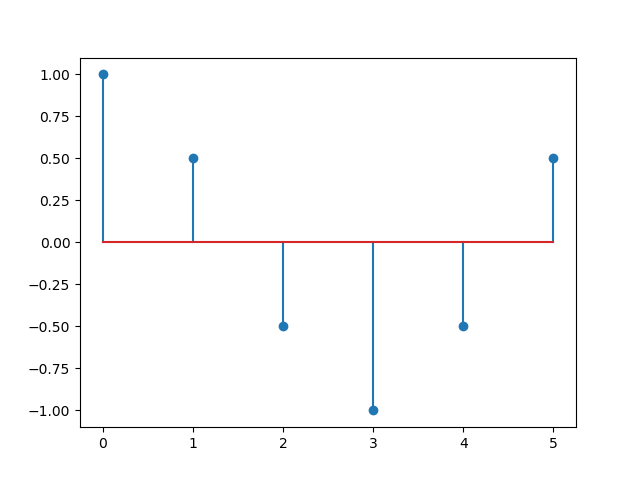

<IPython.core.display.Javascript object>


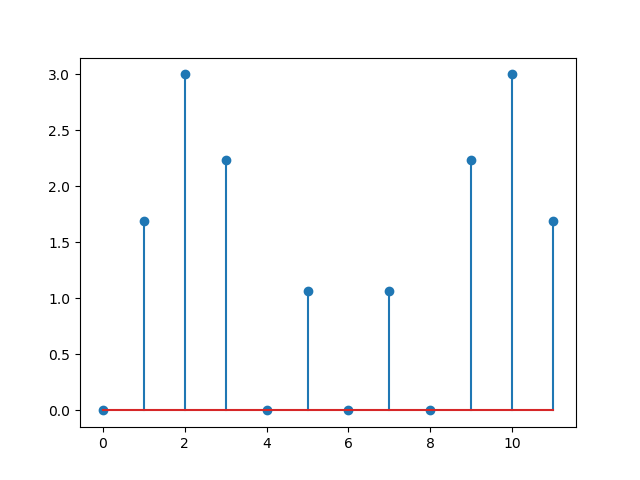

<StemContainer object of 3 artists>

In [14]:
n = np.arange(6)
x = np.cos(np.pi * n / 3)
pyplot.figure()
pyplot.stem(x)
X = fft.fft(x, 12)
pyplot.figure()
pyplot.stem(np.abs(X))